# The Sparks Foundation

## Data Science and Business Analytics

### Stock Market Prediction using Numerical and Textual Analysis - By Sabyasachi Seal

## Importing the libraries

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn import metrics 
import pandas as pd 
import numpy as np
import math

## Loading and Testing Stock Market Dataset

In [87]:
df_prices = pd.read_csv('Datasets/stockprices.csv')
df_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600


## Loading and Testing News Dataset

In [88]:
cols = ['Date', 'Category', 'News']
df_news = pd.read_csv("Datasets/news.csv", names=cols)
df_news = df_news.dropna(axis=0, how='any')
df_news

,Date,Category,News
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
149995,20021015,india,Post polls; India cringes as Pak finds acceptance
149996,20021015,india,Bangladesh is al-Qaeda's new haven: Time
149997,20021015,india,Hawk deal not finalised yet: India to UK
149998,20021015,city.kolkata,A helping hand to clear clinical waste


## Cleaning Data - Dropping Unwanted Values (NaN)

In [89]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis=1, inplace=True)
df_news

,Date,News
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
5,20010102,Dilute the power of transfers; says Riberio
...,...,...
149995,20021015,Post polls; India cringes as Pak finds acceptance
149996,20021015,Bangladesh is al-Qaeda's new haven: Time
149997,20021015,Hawk deal not finalised yet: India to UK
149998,20021015,A helping hand to clear clinical waste


## Preprocessing - Coneverting the 'Date' columns to Datetime

In [90]:
df_news['Date'] = pd.to_datetime(df_news['Date'], format='%Y%m%d')
df_prices['Date'] = pd.to_datetime(df_prices.Date, format='%Y-%m-%d')
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-01,26.010000,26.379999,25.860001,25.900000,24.324486,55900
1,2017-03-02,25.830000,25.920000,25.660000,25.770000,24.202393,41800
2,2017-03-03,25.780001,26.070000,25.459999,25.780001,24.211786,70400
3,2017-03-06,25.680000,25.889999,25.440001,25.830000,24.258745,42600
4,2017-03-07,25.700001,25.879999,25.549999,25.840000,24.268139,45600
...,...,...,...,...,...,...,...
1253,2022-02-18,49.080002,49.950001,48.669998,49.500000,49.500000,130500
1254,2022-02-22,49.080002,50.540001,48.970001,49.490002,49.490002,107200
1255,2022-02-23,50.099998,50.320000,49.049999,49.480000,49.480000,125300
1256,2022-02-24,48.349998,49.709999,47.070000,48.980000,48.980000,189600


## Plotting the Data 

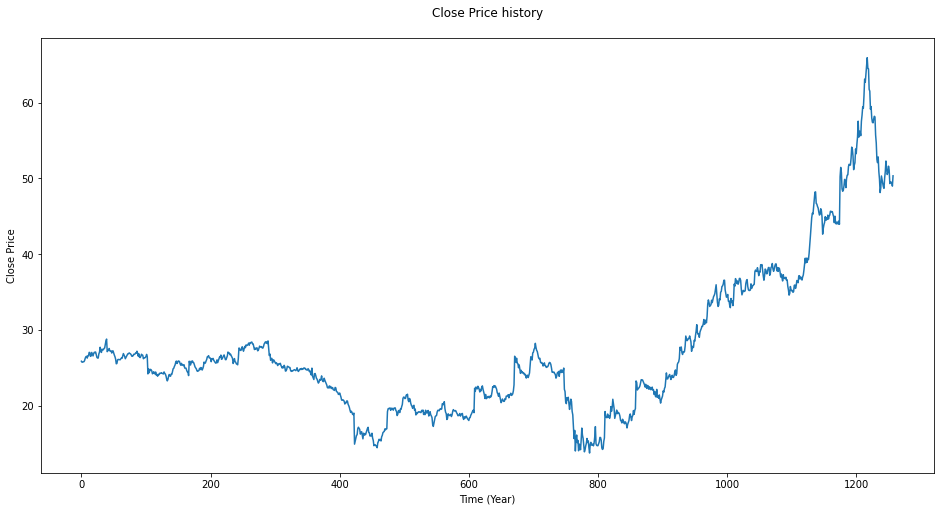

In [91]:
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df_prices['Close'])

## Storing Closing Stock

In [92]:
def new_dataset(df_prices2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df_prices2)-look_back):
        a = df_prices2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df_prices2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

df2 = pd.read_csv('Datasets/stockprices.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## Data Normalization

In [93]:
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

train_size = int(len(df2) * 0.80)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

look_back = 2
trainX, trainY = new_dataset(train, look_back)
testX, testY = new_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## LSTM Neural Network Model for Numerical Analysis

In [94]:
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
201/201 - 2s - loss: 0.0077 - 2s/epoch - 8ms/step
Epoch 2/100
201/201 - 0s - loss: 0.0026 - 269ms/epoch - 1ms/step
Epoch 3/100
201/201 - 0s - loss: 8.1436e-04 - 268ms/epoch - 1ms/step
Epoch 4/100
201/201 - 0s - loss: 1.4748e-04 - 274ms/epoch - 1ms/step
Epoch 5/100
201/201 - 0s - loss: 1.2264e-04 - 317ms/epoch - 2ms/step
Epoch 6/100
201/201 - 0s - loss: 1.2293e-04 - 343ms/epoch - 2ms/step
Epoch 7/100
201/201 - 0s - loss: 1.2489e-04 - 295ms/epoch - 1ms/step
Epoch 8/100
201/201 - 0s - loss: 1.2133e-04 - 286ms/epoch - 1ms/step
Epoch 9/100
201/201 - 0s - loss: 1.2182e-04 - 357ms/epoch - 2ms/step
Epoch 10/100
201/201 - 0s - loss: 1.1899e-04 - 265ms/epoch - 1ms/step
Epoch 11/100
201/201 - 0s - loss: 1.2035e-04 - 268ms/epoch - 1ms/step
Epoch 12/100
201/201 - 0s - loss: 1.1847e-04 - 269ms/epoch - 1ms/step
Epoch 13/100
201/201 - 0s - loss: 1.1930e-04 - 269ms/epoch - 1ms/step
Epoch 14/100
201/201 - 0s - loss: 1.1908e-04 - 269ms/epoch - 1ms/step
Epoch 15/100
201/201 - 0s - loss: 1.1881

### The Model is now ready to make predictions.

## Making Predictions.

In [95]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### We Need to Plot the Predictions.

## Shifting Train Predictions.

In [96]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

## Shifting Test Predictions.

In [97]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(df2), :] = testPredict

## Plotting the Data

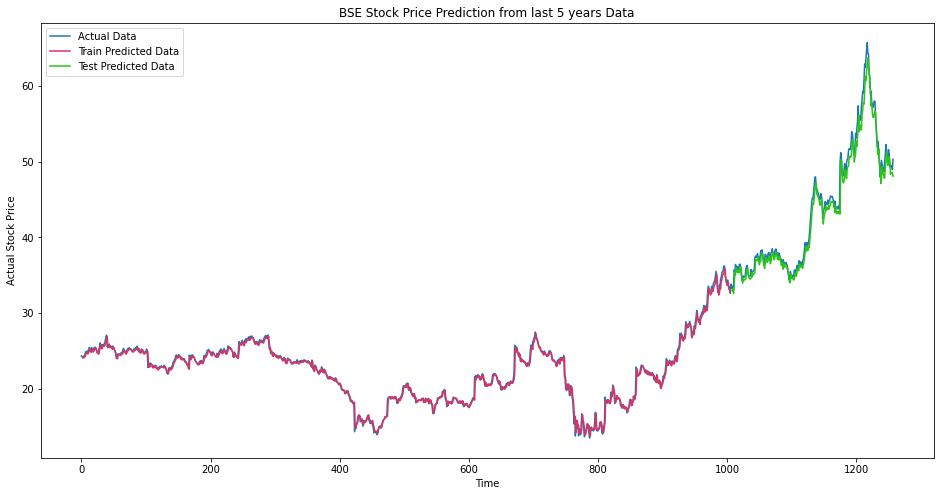

In [108]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('BSE Stock Price Prediction from last 5 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#29c714', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()